# Project: Investigate a Dataset (investigate TMDB movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains movie information such as cast and genre, and also financial information regarding the movie's budget and revenue. 
> The questions I plan to answer for these analyses are regarding three main aspects of the dataset:
#### 1- How movie industry has developed over years?
#### 2- what is the most / least profitable genre?
#### 3- who is the most successful director in our dataset?


In [45]:
# mport statements for all of the packages that are planed to use.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### 1- General Properties
#### first we will check for the general properties of our dataset:

In [46]:
# load the data from csv file to pandas dataframe
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [47]:
# check the number of rows and columns
df.shape

(10866, 21)

In [48]:
# check for duplicated rows
df.duplicated().sum() 

1

In [49]:
df[df.duplicated() == True] 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [50]:
# check for NULL values
df.isnull().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [51]:
# check for columns labels
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [52]:
# check for info about each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [53]:
# know the number of unique values of each column
df.nunique() 

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [54]:
# check for values on genres column
df.genres.value_counts() 

Drama                                             712
Comedy                                            712
Documentary                                       312
Drama|Romance                                     289
Comedy|Drama                                      280
                                                 ... 
Action|Fantasy|Horror|Science Fiction|Thriller      1
Music|Family|Drama                                  1
Action|Thriller|Science Fiction|Horror              1
Romance|Science Fiction|Horror|Action|Crime         1
Action|Drama|Crime|Thriller                         1
Name: genres, Length: 2039, dtype: int64

In [55]:
# check for number of movies for each year
df.release_year.value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1972     40
1967     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [56]:
# number of movies for each director
df.director.value_counts()

Woody Allen                    45
Clint Eastwood                 34
Martin Scorsese                29
Steven Spielberg               29
Ridley Scott                   23
                               ..
Brent Hodge|Derik Murray        1
Shaun Monson                    1
Rusty Cundieff                  1
Burny Mattinson                 1
Philip Sansom|Olly Williams     1
Name: director, Length: 5067, dtype: int64

## 2- Data Cleaning:
###### after exploring our data I found some issues that will make the analysis harder and insufficient, they are:
#### 1- unneeded columns
#### 2- duplicated rows
#### 3- null values
#### 4- messy genre column 
#### 5- large numbers in budget and revenue columns


### 1- drop columns that are not needed in analysis:
###### some columns are not needed to answer the questions we ask and make the data looks so messy,  with removing these columns we also removed most of the NULL values in the dataset.



In [57]:
# drop columns that are not needed in analysis, 
df = df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], axis= 1 )

In [58]:
# check for removed columns
df.head() 

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


### 2- drop duplicated rows:
###### we have a duplicated row that we should remove

In [59]:
# drop duplicates
df = df.drop_duplicates() 

In [60]:
# check for removed duplicates
df.duplicated().sum() 

0

### 3- drop nulls:
###### we will still have some null values that we will need to remove

In [61]:
# drop nulls
df = df.dropna(axis= 0)

In [62]:
# check for nulls
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

### 4- fix genres columns
###### the geners column is too messy with many genres conctenated together that make the analysis for each genre alone looks impossible 


##### we need to split each genre to a seperate coumn
##### first by adding geners to a seperate list:

In [63]:
# add geners to a seperate list
genre_list = []
for g in df['genres'].items():
    for gen in g[1].split('|'): 
        if gen not in genre_list:
            genre_list.append(gen)
        else:
            continue 
genre_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

##### now we will create a seperate column for each genre with the value True if the movie in this genre:

In [64]:
# create a seperate column for each genre
for genre in genre_list:
    df[genre] = df['genres'].str.contains(genre)

In [65]:
df.head(20) 

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,...,False,False,False,False,False,False,False,False,False,False
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,...,False,False,False,False,False,False,False,False,False,False
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,...,False,False,False,False,False,False,False,False,False,False
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,...,False,False,False,False,False,False,False,False,False,False
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,...,False,False,False,False,False,False,False,False,False,False
5,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,...,False,False,False,False,False,False,False,False,False,False
6,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,...,False,False,False,False,False,False,False,False,False,False
7,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,...,False,False,False,False,False,False,False,False,False,False
8,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,...,True,False,False,False,False,False,False,False,False,False
9,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,...,True,False,False,False,False,False,False,False,False,False


### 5- minimize the budget and revenue columns:
###### these columns are in too large numbers to be compared and visualized with other variables

In [66]:
df['budget_in_millions'] = df['budget']/10000000

In [67]:
df['revenue_in_millions'] =  df['revenue']/10000000

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How the movie industry has developed over years?)

###### statistical overview of all data

In [68]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_in_millions,revenue_in_millions
count,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,0.649455,1.471114e+07,4.006558e+07,102.189722,218.600741,5.970880,2001.289537,1.471114,4.006558
std,1.002441,3.098677e+07,1.173193e+08,30.783873,577.165055,0.933006,12.819545,3.098677,11.731926
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000,0.000000
25%,0.209156,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000,0.000000
50%,0.385471,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000,0.000000
75%,0.717508,1.564374e+07,2.455409e+07,111.250000,147.000000,6.600000,2011.000000,1.564374,2.455409
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,42.500000,278.150585


###### looking for the number of movies that are produeced each year...

In [69]:
# number of movies over years
df.release_year.value_counts()

2014    694
2013    652
2015    624
2012    581
2011    539
2009    528
2008    488
2010    479
2007    435
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    224
1998    210
1996    203
1997    191
1994    184
1993    177
1995    174
1988    144
1989    136
1991    133
1992    133
1990    132
1987    125
1986    121
1985    108
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1973     55
1971     55
1976     47
1966     46
1974     46
1975     44
1964     42
1972     40
1970     40
1968     39
1967     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

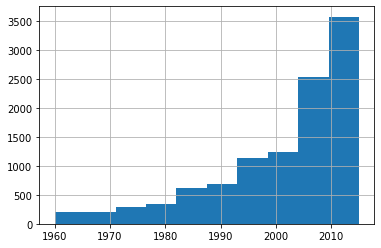

In [70]:
# number of movies over years
df.release_year.hist();

###### comparing the mean budget that spent on all movies that are produced in each year...

In [71]:
# mean budget over years
df.groupby('release_year')['budget'].mean()

release_year
1960    6.892796e+05
1961    1.488290e+06
1962    1.710066e+06
1963    2.156809e+06
1964    9.400753e+05
1965    2.005860e+06
1966    1.251191e+06
1967    2.580826e+06
1968    1.844590e+06
1969    1.359003e+06
1970    3.174049e+06
1971    1.381764e+06
1972    9.069813e+05
1973    1.185287e+06
1974    1.673261e+06
1975    1.279068e+06
1976    2.598936e+06
1977    2.834737e+06
1978    3.215339e+06
1979    4.470421e+06
1980    4.647436e+06
1981    4.558022e+06
1982    5.404877e+06
1983    6.488843e+06
1984    6.944876e+06
1985    6.932598e+06
1986    5.822592e+06
1987    5.675646e+06
1988    6.426028e+06
1989    7.938650e+06
1990    9.772137e+06
1991    1.102431e+07
1992    1.084034e+07
1993    1.005440e+07
1994    1.211526e+07
1995    1.647060e+07
1996    1.816277e+07
1997    2.487480e+07
1998    2.142695e+07
1999    2.573766e+07
2000    2.545442e+07
2001    2.341056e+07
2002    2.216030e+07
2003    2.220590e+07
2004    2.335616e+07
2005    2.022943e+07
2006    1.790732e+07


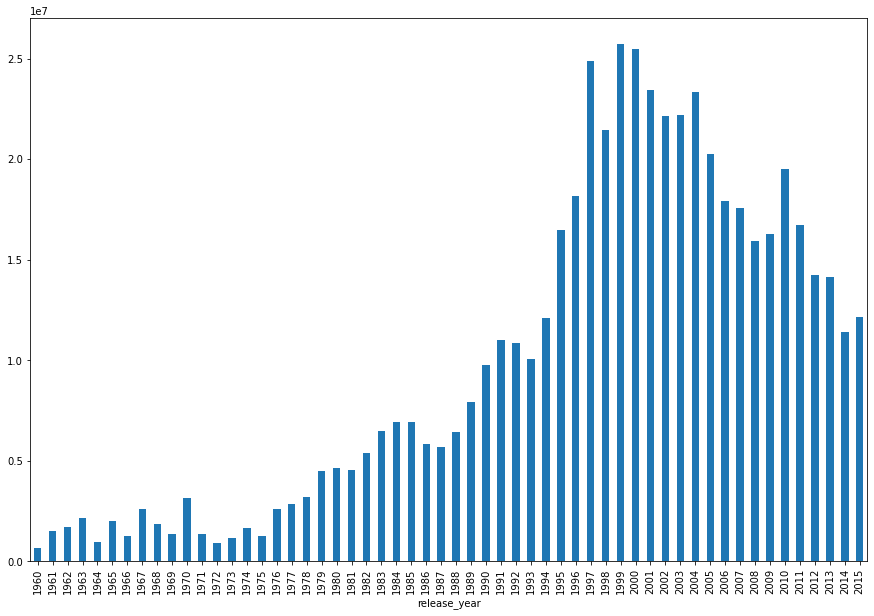

In [72]:
# mean budget over years
df.groupby('release_year')['budget'].mean().plot(kind='bar', figsize=(15, 10));

###### comparing the total revenue gained from all movies that produced in each year...

In [73]:
# total revenue for each year 
df.groupby('release_year')['revenue'].sum()

release_year
1960      145005000
1961      337720188
1962      215579846
1963      187404989
1964      340981782
1965      458081854
1966       84736689
1967      737834637
1968      264732980
1969      243957076
1970      560221969
1971      404910610
1972      494730171
1973     1223981102
1974      812539818
1975      957489966
1976      801005600
1977     2180583159
1978     1369779659
1979     1684794913
1980     1768662387
1981     1774606236
1982     2458443852
1983     2307529320
1984     2635524418
1985     2875772392
1986     3002778281
1987     3462104847
1988     3739550845
1989     5164923718
1990     5315166660
1991     4706599796
1992     6078153217
1993     6955151167
1994     7095429177
1995     9156341160
1996     8311492279
1997    10655173234
1998     9493174938
1999    11355712579
2000    10978701012
2001    13410083139
2002    14643618528
2003    15138243542
2004    16793822618
2005    16516835108
2006    16275739385
2007    19411668670
2008    19420695138
2009   

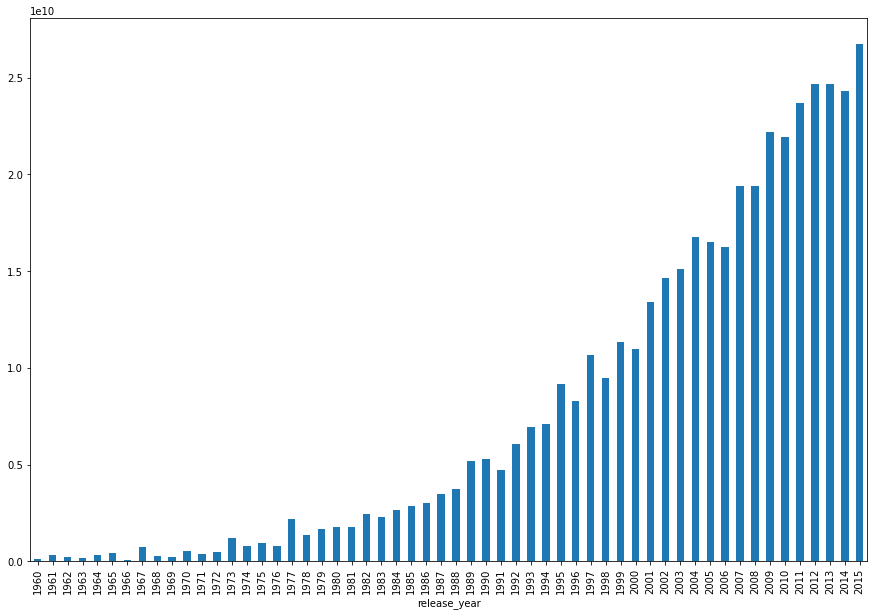

In [74]:
# total revenue for each year 
df.groupby('release_year')['revenue'].sum().plot(kind='bar', figsize=(15, 10));

###### comparing the popularities of the most popular movie of each year...

In [75]:
# max popularity for each year 
df.groupby('release_year')['popularity'].max()

release_year
1960     2.610362
1961     2.631987
1962     3.170651
1963     2.508235
1964     3.153791
1965     1.910465
1966     1.227582
1967     2.550704
1968     3.309196
1969     1.778746
1970     1.936962
1971     3.072555
1972     5.738034
1973     2.272486
1974     3.264571
1975     3.258151
1976     2.582657
1977    12.037933
1978     1.697618
1979     4.935897
1980     5.488441
1981     4.578300
1982     4.215642
1983     4.828854
1984     4.831966
1985     6.095293
1986     2.485419
1987     3.474728
1988     3.777441
1989     4.143585
1990     2.679627
1991     3.852269
1992     4.586426
1993     2.571339
1994     8.093754
1995     4.765359
1996     4.480733
1997     6.668990
1998     4.180540
1999     8.947905
2000     4.271452
2001     8.575419
2002     8.095275
2003     7.122455
2004     5.827781
2005     5.939927
2006     5.838503
2007     4.965391
2008     8.466668
2009     9.432768
2010     9.363643
2011     8.411577
2012     7.637767
2013     6.112766
2014    24.9491

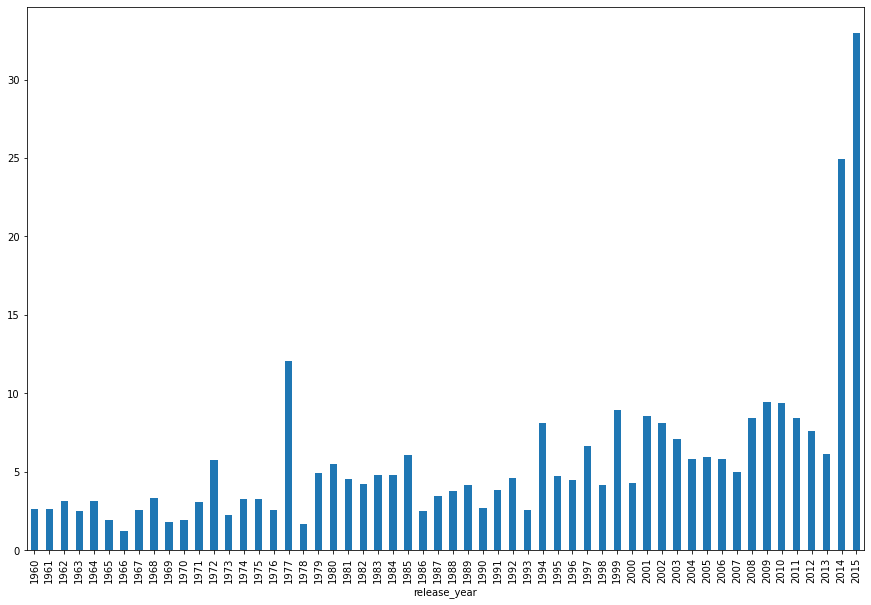

In [76]:
# max popularity for each year 
df.groupby('release_year')['popularity'].max().plot(kind='bar', figsize=(15, 10));

### Research Question 2  (what is the most / least profitable genre?)

###### comparing popualrity of genres...

In [105]:
# first we add each genre with its mean popularity to create dataframe of mean popularities
popularity_means = {}
for genre in genre_list:
    mean_pop = df[df[genre]]['popularity'].mean()
    popularity_means[genre] = mean_pop
    
df_pop = pd.DataFrame(popularity_means, index = ['genres'])
df_pop
    

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
genres,0.92831,1.157736,1.005689,0.742092,0.996699,0.745331,0.594216,0.592059,0.790768,0.858912,0.593915,0.690316,0.593143,0.727683,0.579396,0.492814,0.46537,0.183055,0.272252,0.19091


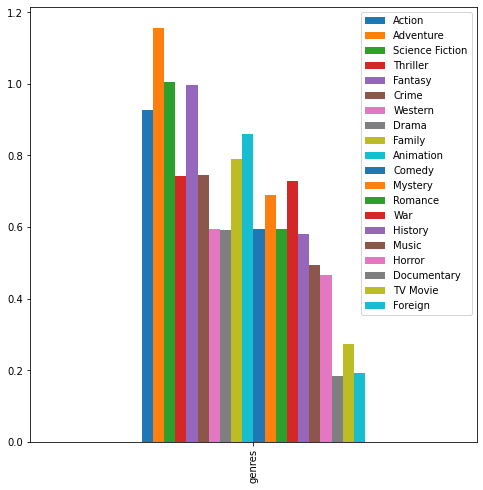

In [106]:
# compare mean popularities
df_pop.plot(kind='bar', figsize=(8, 8));

###### compare revenue gained by each genre...

In [107]:
# first we add each genre with its mean revenue to create dataframe of mean revenues
revenue_means = {}
for genre in genre_list:
    mean_rev = df[df[genre]]['revenue'].mean()
    revenue_means[genre] = mean_rev
    
df_rev = pd.DataFrame(revenue_means, index = ['genres'])
df_rev

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
genres,7.297840e+07,1.135237e+08,7.048467e+07,4.177153e+07,9.673609e+07,4.239998e+07,2.874291e+07,2.926684e+07,7.290698e+07,7.601732e+07,3.763248e+07,4.026728e+07,3.576912e+07,47605183.3,3.220464e+07,28998213.0,1.683309e+07,2.085217e+06,259259.259259,1.485656e+06


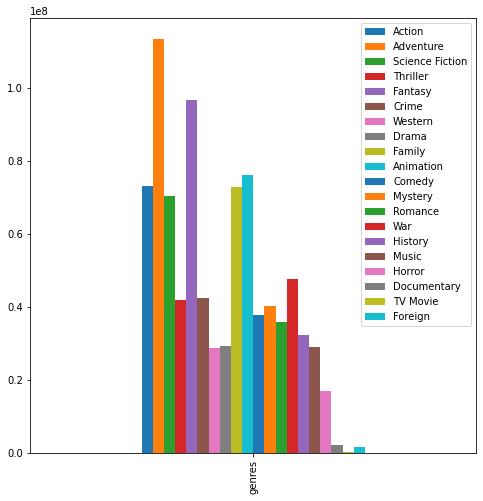

In [108]:
# compare mean revenues
df_rev.plot(kind='bar', figsize=(8, 8));

###### is the number of genres produced affect our analysis ?

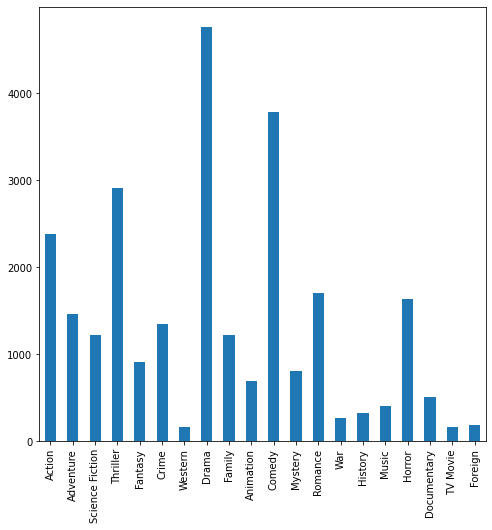

In [81]:
# most produced genre
df[genre_list].sum().plot(kind='bar', figsize=(8, 8));

### Research Question 3  (who is the most successful director?)

##### by comparing the directors in three aspects( highest revenue, most popular movie, highest vote average)
###### first we will find the director who directed the movie with the highest revenue of all years...

In [82]:
# director with the highest revenue 
df[df['revenue'] == df.groupby('director')['revenue'].max().max()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,...,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign,budget_in_millions,revenue_in_millions
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,...,False,False,False,False,False,False,False,False,23.7,278.150585


###### then we will find the director who directed the most popular movie of all years...

In [83]:
# director with the most popular movie
df[df['popularity'] == df.groupby('director')['popularity'].max().max() ]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,...,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign,budget_in_millions,revenue_in_millions
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,...,False,False,False,False,False,False,False,False,15.0,151.352881


###### lastly we will find the director who directed the movie with highest vote average of all years...

In [84]:
# director with the highest vote 
df[df['vote_average'] == df.groupby('director')['vote_average'].max().max() ]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,...,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign,budget_in_millions,revenue_in_millions
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,9/3/11,14,9.2,...,False,False,False,False,False,True,False,False,0.0,0.0


###### so now let's compare the 3 directors according to the three categories ,but for all of thier works...

In [85]:
# we will create a dataframe contain the data for the three directors
df_dir = df.query('director == "James Cameron" or director == "Colin Trevorrow" or director == "Mark Cousins" ')
df_dir

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,...,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign,budget_in_millions,revenue_in_millions
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,...,False,False,False,False,False,False,False,False,15.000000,151.352881
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,...,False,False,False,False,False,False,False,False,23.700000,278.150585
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,9/3/11,14,9.2,...,False,False,False,False,False,True,False,False,0.000000,0.000000
4186,1.843243,115000000,378882411,True Lies,James Cameron,141,Action|Thriller,7/14/94,620,6.6,...,False,False,False,False,False,False,False,False,11.500000,37.888241
4604,0.408010,750000,4007792,Safety Not Guaranteed,Colin Trevorrow,85,Comedy|Romance|Science Fiction|Drama,6/8/12,341,6.7,...,True,False,False,False,False,False,False,False,0.075000,0.400779
5142,0.253381,13000000,17040871,Ghosts of the Abyss,James Cameron,92,Family|Documentary,4/10/03,23,6.7,...,False,False,False,False,False,True,False,False,1.300000,1.704087
5231,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama|Romance|Thriller,11/18/97,4654,7.3,...,True,False,False,False,False,False,False,False,20.000000,184.503419
7882,4.831966,6400000,78371200,The Terminator,James Cameron,108,Action|Thriller|Science Fiction,10/26/84,2692,7.1,...,False,False,False,False,False,False,False,False,0.640000,7.837120
8404,0.346695,145786,0,Piranha Part Two: The Spawning,James Cameron,84,Horror|Drama|Romance,1/1/81,14,4.8,...,True,False,False,False,True,False,False,False,0.014579,0.000000
9189,1.691080,70000000,90000098,The Abyss,James Cameron,139,Adventure|Action|Thriller|Science Fiction,8/8/89,446,6.9,...,False,False,False,False,False,False,False,False,7.000000,9.000010


###### comparing mean revenue, mean popularity and mean vote of the 3 directors to find the best...

In [86]:
df_dir.groupby('director')['popularity', 'revenue_in_millions', 'vote_average'].mean()

C:\Users\Tony Tech\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,popularity,revenue_in_millions,vote_average
director,,,
Colin Trevorrow,16.696886,75.876830,6.600000
James Cameron,3.202686,64.909943,6.844444
Mark Cousins,0.006925,0.000000,9.200000


C:\Users\Tony Tech\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


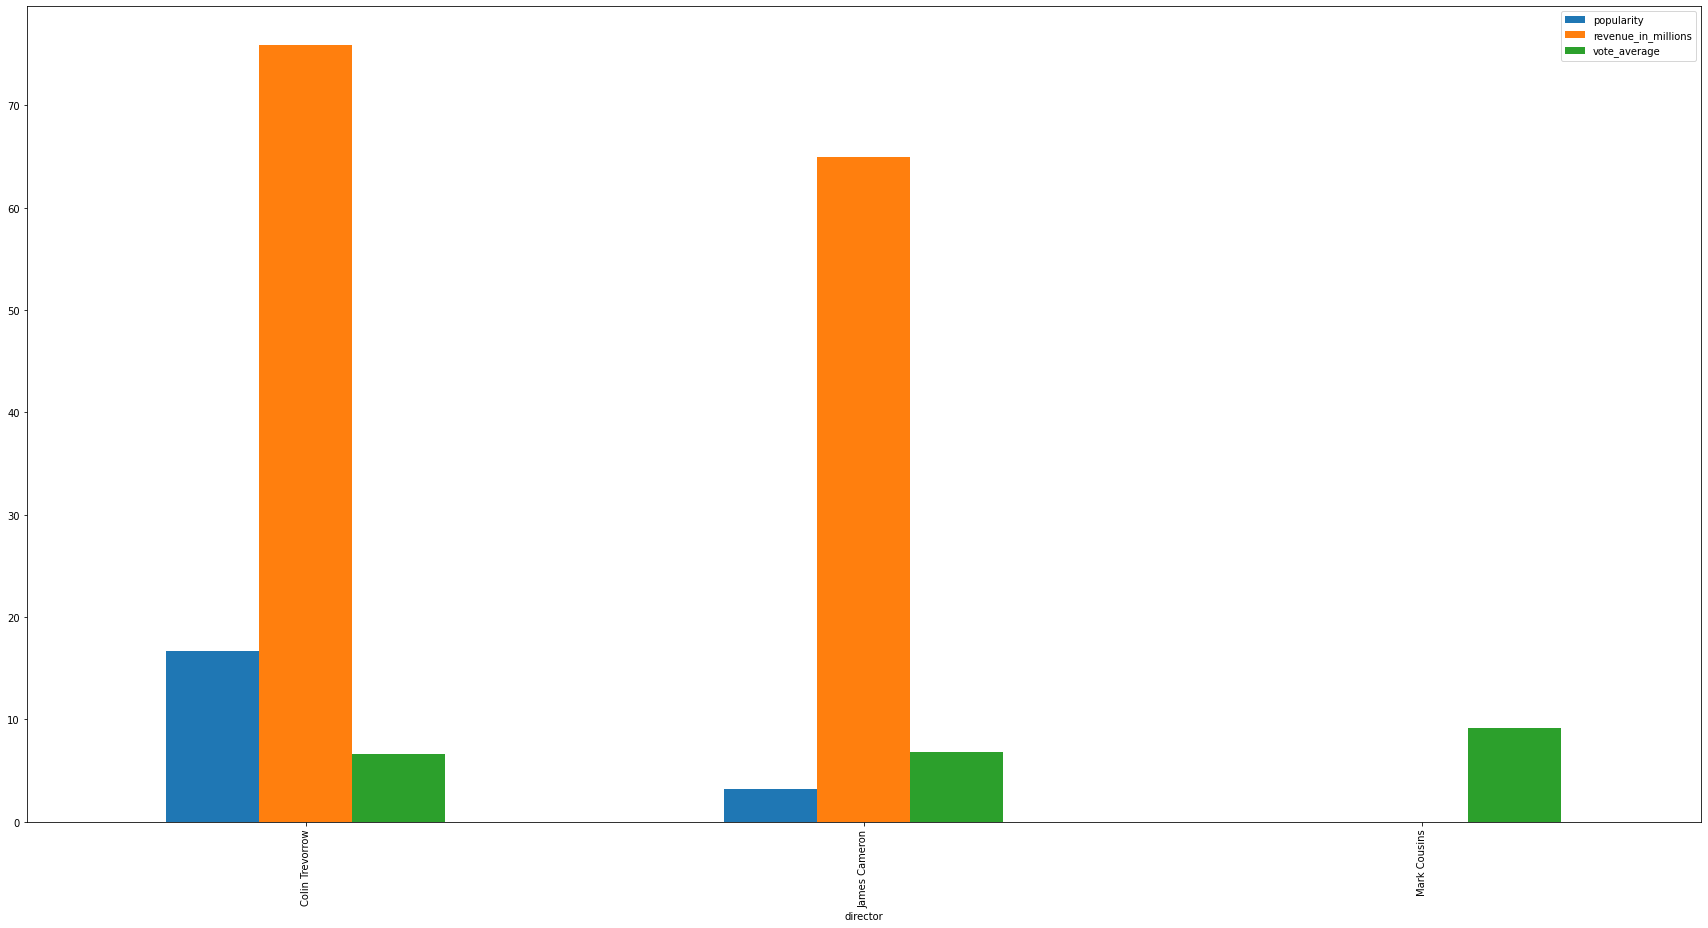

In [87]:
df_dir.groupby('director')['popularity', 'revenue_in_millions', 'vote_average'].mean().plot(kind= 'bar', figsize=(30, 15));

<a id='conclusions'></a>
## Conclusions:
###### 1- the movie industry has indeedly developed over years.
###### 2- The Adventure movies genre is the most profitable genre and the Forein genre is the least.
###### 3- Colin Trevorrow is our most successful director.



## limitations:
### Question 1 analysis:
###### Sample must be good enough to represent the population
# -
### Question 2 analysis:
###### the dropped missed or null values might skew the analysis or showing unintentional bias
# -
### Question 3 analysis:
###### some 'revenue' values are zero for some directors that may because the dataset given may be incomplete due to the source that might skew the analysis or show unintentional bias.

## 1- the movie industry has developed over years according to:
#### - number of movies produced over years
#### - the average budget spent for each year
#### - the total revenue gained for each year
#### - the popularity of movies increased over years

######  number of movies produced over years

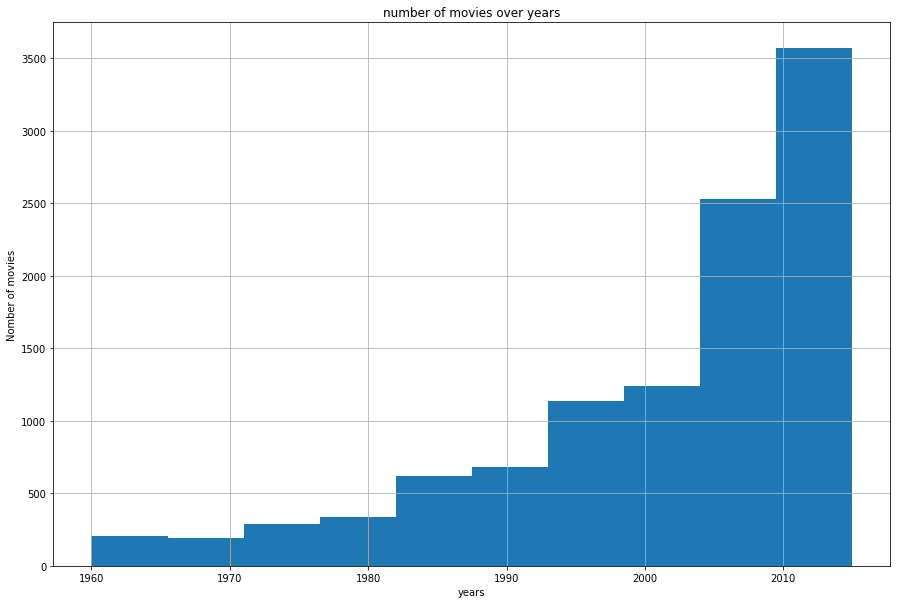

In [92]:
mov_nom = df.release_year.hist(figsize=(15, 10))
mov_nom.set_ylabel('Nomber of movies')
mov_nom.set_xlabel('years')
mov_nom.set_title('number of movies over years');

###### the average budget spent for each year

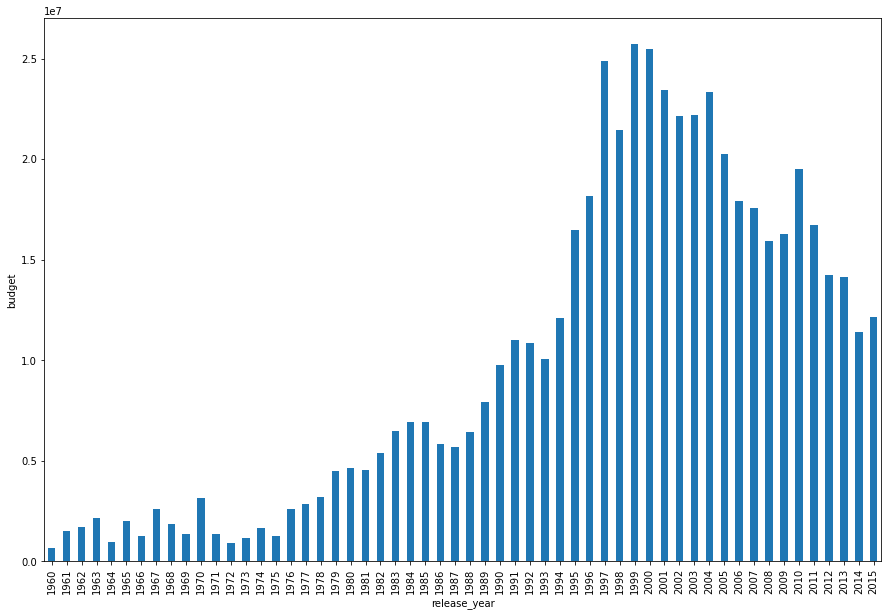

In [95]:
df.groupby('release_year')['budget'].mean().plot(kind='bar', figsize=(15, 10)).set_ylabel('budget');

###### the total revenue gained for each year

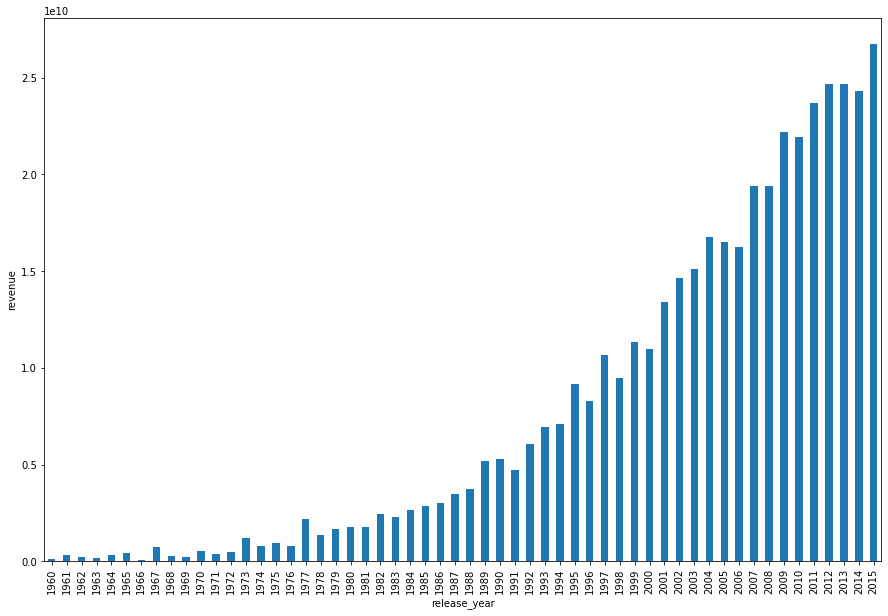

In [96]:
df.groupby('release_year')['revenue'].sum().plot(kind='bar', figsize=(15, 10)).set_ylabel('revenue');

###### the popularity of movies increased over years

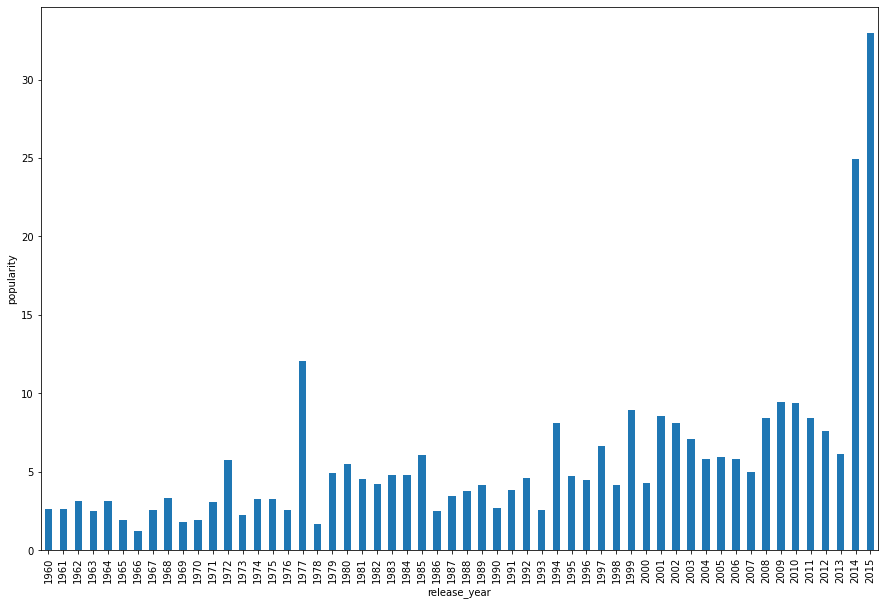

In [98]:
df.groupby('release_year')['popularity'].max().plot(kind='bar', figsize=(15, 10)).set_ylabel('popularity');

## 2- The Adventure movies genre is the most profitable genre and the Forein genre is the least:
###### Adventure movies genre gained the highest revenue of all genres and they are the most popular ones, although they are not the highest number of produced movies.
###### Forein genre is the least profitable ,but that may because they are not much produced over years.

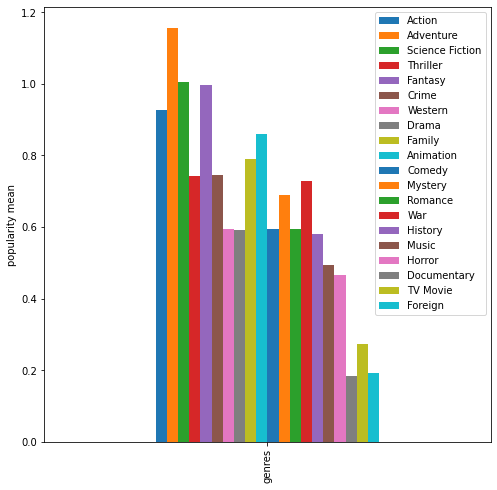

In [111]:
df_pop.plot(kind='bar', figsize=(8, 8)).set_ylabel('popularity mean');

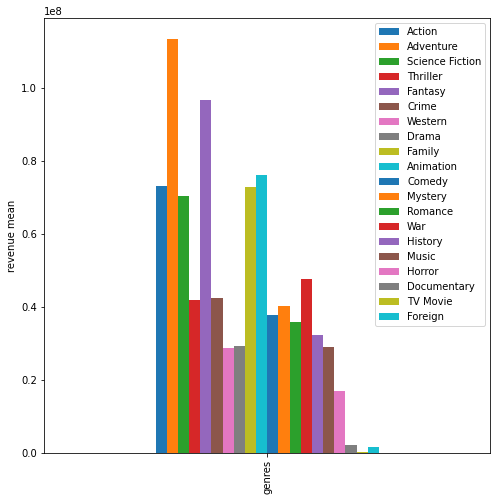

In [112]:
df_rev.plot(kind='bar', figsize=(8, 8)).set_ylabel('revenue mean');

## 3- Colin Trevorrow is our most successful director:
###### in addition to he directed the most popular movie of all time "Jurassic World", his movies have the most mean popularity and the most mean revenue gained in comparison with other directors.

C:\Users\Tony Tech\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


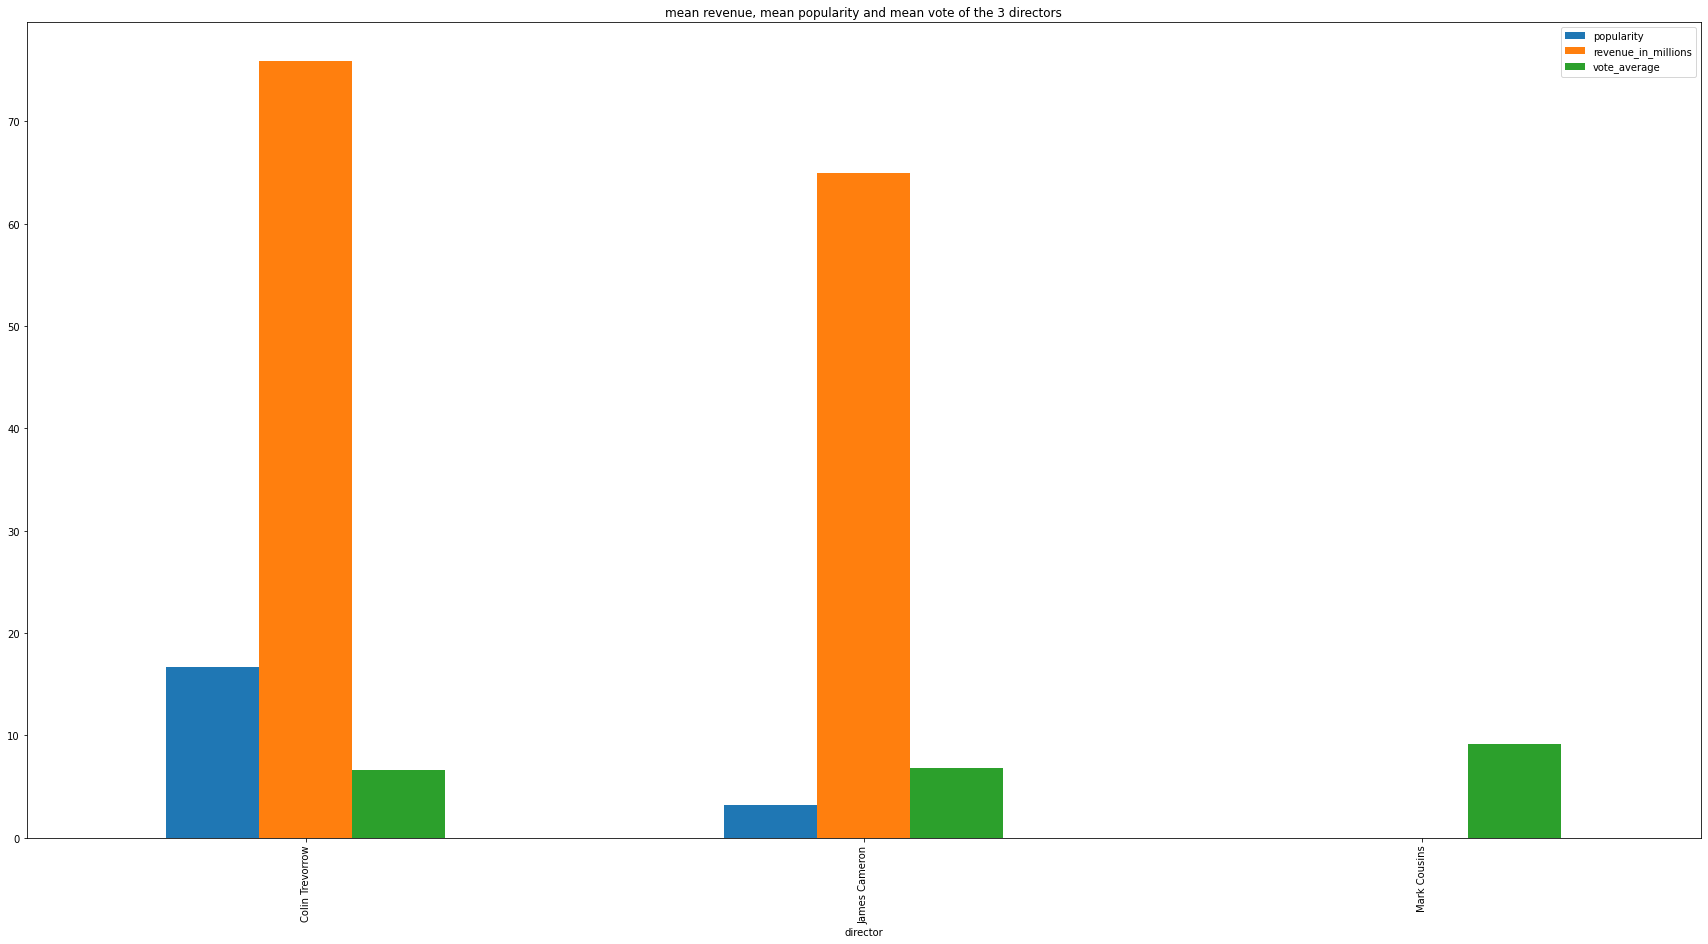

In [115]:
df_dir.groupby('director')['popularity', 'revenue_in_millions', 'vote_average'].mean().plot(kind= 'bar', figsize=(30, 15)).set_title('mean revenue, mean popularity and mean vote of the 3 directors');